In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:

df_1year = pd.read_csv('data_1year.csv', index_col=0).reindex()
df_1year = df_1year.rename(columns={ 
                                    '1y_ret':'y1_ret',
                                    '1y_ret_ward_y':'y1_ret_ward_y'
                                   })

#load respective features
df_data_1year = pd.read_excel('data_1year_features.xlsx', index_col=0)
#df_data_1year = df_data_1year.drop(['Ward'], axis=1)
#df_data_1year['crime_low'] =0
df_data_1year.columns

Index(['1y_ret', '1y_ret_ward', 'Price', 'Year', 'Type', 'Ward',
       'Number of Parks', 'Number of Primary Schools',
       'Primary School AVG Rating', 'Number of Secondary Schools',
       'Secondary School AVG Rating', 'Number of Post 16 Schools',
       'Post 16 School AVG Rating', 'Number of Healthcare Services',
       'Number of Dentistries', 'Number of High Severity Crimes Previous Year',
       'Number of Low Severity Crimes Previous Year'],
      dtype='object')

In [3]:
df_1year

,y1_ret,1y_ret_ward,Price,Year,Type,Ward
16,0.102282,0.092857,765000.0,2011,D,Claygate
32,0.131559,0.160131,887500.0,2012,D,Claygate
48,-0.024570,0.030986,915000.0,2013,D,Claygate
64,0.019845,0.133880,1037500.0,2014,D,Claygate
80,-0.033906,-0.002410,1035000.0,2015,D,Claygate
...,...,...,...,...,...,...
703,0.223802,0.244211,591000.0,2017,T,Weybridge St George's Hill
719,-0.048127,-0.043993,565000.0,2018,T,Weybridge St George's Hill
735,-0.097640,-0.101770,507500.0,2019,T,Weybridge St George's Hill
751,0.088065,0.128079,572500.0,2020,T,Weybridge St George's Hill


In [4]:
df_data_1year.describe()

,1y_ret,1y_ret_ward,Price,Year,Number of Parks,Number of Primary Schools,Primary School AVG Rating,Number of Secondary Schools,Secondary School AVG Rating,Number of Post 16 Schools,Post 16 School AVG Rating,Number of Healthcare Services,Number of Dentistries,Number of High Severity Crimes Previous Year,Number of Low Severity Crimes Previous Year
count,704.000000,704.000000,7.040000e+02,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,0.018754,0.060116,5.900300e+05,2016.000000,13.000000,3.000000,1.791667,1.000000,0.250000,0.875000,0.187500,1.312500,2.312500,194.568182,639.477273
std,0.215321,0.218484,3.227551e+05,3.164526,11.829995,1.061414,0.863627,1.118829,1.437162,0.696465,1.380235,1.402725,2.593144,118.427131,326.404316
min,-0.772701,-0.790882,1.250000e+05,2011.000000,0.000000,1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,16.000000
25%,-0.066136,-0.036028,3.571250e+05,2013.000000,7.000000,2.000000,1.625000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,130.000000,436.250000
50%,0.001865,0.039602,4.952488e+05,2016.000000,9.000000,3.000000,2.000000,1.000000,-1.000000,1.000000,-1.000000,1.000000,2.000000,199.500000,626.500000
75%,0.073964,0.127960,7.086875e+05,2019.000000,14.750000,3.250000,2.000000,1.000000,2.000000,1.000000,2.000000,2.250000,3.250000,261.250000,852.500000
max,2.223075,2.253333,1.700000e+06,2021.000000,52.000000,5.000000,3.000000,4.000000,2.000000,2.000000,2.000000,4.000000,10.000000,490.000000,1541.000000


In [5]:
# column_low = [ 'Number of crimes: Anti-social behaviour',
#  'Number of crimes: Other theft',
#  'Number of crimes: Drugs', 
#  'Number of crimes: Public order',
#  'Number of crimes: Theft from the person',
# 'Number of crimes: Other crime',
# 'Number of crimes: Shoplifting',
# 'Number of crimes: Bicycle theft',
#  'Number of crimes: Crime Type N/A'
# ]
# df_data_1year['crime_low'] = df_data_1year[column_low].sum(axis=1)

# column_high = [ 'Number of crimes: Vehicle crime',
#  'Number of crimes: Violent crime', 
#  'Number of crimes: Burglary', 
#  'Number of crimes: Criminal damage and arson',
#  'Number of crimes: Public disorder and weapons',
#  'Number of crimes: Violence and sexual offences',
#  'Number of crimes: Possession of weapons',
# 'Number of crimes: Robbery'
# ]
# df_data_1year['crime_high'] =  df_data_1year[column_high].sum(axis=1)

df_data_1year = df_data_1year.rename(columns={
                                    'Number of Primary Schools':'Num_Primary_Schools',
                                    'Primary School AVG Rating':'Primary_School_AVG_Rating',
                                    'Number of Secondary Schools':'Num_Secondary_Schools',
                                    'Secondary School AVG Rating':'Secondary_School_AVG_Rating',
                                    'Number of Post 16 Schools':'Num_Post_16_Schools',
                                    'Post 16 School AVG Rating':'Post_16_School_AVG_Rating',
                                    'Number of High Severity Crimes Previous Year':'Number_of_High_Severity_Crimes_Previous_Year',
                                   'Number of Low Severity Crimes Previous Year':'Number_of_Low_Severity_Crimes_Previous_Year',
                                    'Number of Parks':'Number_of_Parks',
                                    'Number of Dentistries':'Number_of_Dentistries',
                                    'Number of Healthcare Services':'Number_of_Healthcare_Services'
                                   })



In [6]:
#merge datasets
df_1year.head()
df = pd.merge(df_1year, df_data_1year, on=['Ward', 'Type', 'Year'])
 #drop columns not needed for predictions
df = df.drop(['Ward', '1y_ret_ward_x', '1y_ret', 'Price_x'
#               'Number of crimes: Vehicle crime',
#  'Number of crimes: Violent crime', 
#  'Number of crimes: Burglary', 
#  'Number of crimes: Criminal damage and arson',
#  'Number of crimes: Public disorder and weapons',
#  'Number of crimes: Violence and sexual offences',
#  'Number of crimes: Possession of weapons',
# 'Number of crimes: Robbery',
#  'Number of crimes: Anti-social behaviour',
#  'Number of crimes: Other theft',
#  'Number of crimes: Drugs', 
#  'Number of crimes: Public order',
#  'Number of crimes: Theft from the person',
# 'Number of crimes: Other crime',
# 'Number of crimes: Shoplifting',
# 'Number of crimes: Bicycle theft',
#  'Number of crimes: Crime Type N/A', 
], axis=1)
df

,y1_ret,Year,Type,1y_ret_ward_y,Price_y,Number_of_Parks,Num_Primary_Schools,Primary_School_AVG_Rating,Num_Secondary_Schools,Secondary_School_AVG_Rating,Num_Post_16_Schools,Post_16_School_AVG_Rating,Number_of_Healthcare_Services,Number_of_Dentistries,Number_of_High_Severity_Crimes_Previous_Year,Number_of_Low_Severity_Crimes_Previous_Year
0,0.102282,2011,D,0.092857,765000.0,5,2,3.0,0,-1,0,-1,0,4,10,26
1,0.131559,2012,D,0.160131,887500.0,5,2,3.0,0,-1,0,-1,0,4,153,291
2,-0.024570,2013,D,0.030986,915000.0,5,2,3.0,0,-1,0,-1,0,4,134,433
3,0.019845,2014,D,0.133880,1037500.0,5,2,3.0,0,-1,0,-1,0,4,101,371
4,-0.033906,2015,D,-0.002410,1035000.0,5,2,3.0,0,-1,0,-1,0,4,121,342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0.223802,2017,T,0.244211,591000.0,10,3,2.0,2,-1,1,-1,1,0,239,625
700,-0.048127,2018,T,-0.043993,565000.0,10,3,2.0,2,-1,1,-1,1,0,277,715
701,-0.097640,2019,T,-0.101770,507500.0,10,3,2.0,2,-1,1,-1,1,0,255,702
702,0.088065,2020,T,0.128079,572500.0,10,3,2.0,2,-1,1,-1,1,0,141,658


In [7]:
df['Type_D'] = [1 if x == 'D' else 0 for x in df['Type']]
df['Type_S'] = [1 if x == 'S' else 0 for x in df['Type']]
df['Type_T'] = [1 if x == 'T' else 0 for x in df['Type']]
df['Type_F'] = [1 if x == 'F' else 0 for x in df['Type']]


In [8]:
df=df.drop(['Type'], axis=1)
df = df.rename(columns={'1y_ret_ward_y':'y1_ret_ward_y'})
df

,y1_ret,Year,y1_ret_ward_y,Price_y,Number_of_Parks,Num_Primary_Schools,Primary_School_AVG_Rating,Num_Secondary_Schools,Secondary_School_AVG_Rating,Num_Post_16_Schools,Post_16_School_AVG_Rating,Number_of_Healthcare_Services,Number_of_Dentistries,Number_of_High_Severity_Crimes_Previous_Year,Number_of_Low_Severity_Crimes_Previous_Year,Type_D,Type_S,Type_T,Type_F
0,0.102282,2011,0.092857,765000.0,5,2,3.0,0,-1,0,-1,0,4,10,26,1,0,0,0
1,0.131559,2012,0.160131,887500.0,5,2,3.0,0,-1,0,-1,0,4,153,291,1,0,0,0
2,-0.024570,2013,0.030986,915000.0,5,2,3.0,0,-1,0,-1,0,4,134,433,1,0,0,0
3,0.019845,2014,0.133880,1037500.0,5,2,3.0,0,-1,0,-1,0,4,101,371,1,0,0,0
4,-0.033906,2015,-0.002410,1035000.0,5,2,3.0,0,-1,0,-1,0,4,121,342,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0.223802,2017,0.244211,591000.0,10,3,2.0,2,-1,1,-1,1,0,239,625,0,0,1,0
700,-0.048127,2018,-0.043993,565000.0,10,3,2.0,2,-1,1,-1,1,0,277,715,0,0,1,0
701,-0.097640,2019,-0.101770,507500.0,10,3,2.0,2,-1,1,-1,1,0,255,702,0,0,1,0
702,0.088065,2020,0.128079,572500.0,10,3,2.0,2,-1,1,-1,1,0,141,658,0,0,1,0


In [9]:
#sns.pairplot(df)
df= df.loc[df['Type_D'] != 0]
df= df.drop(['Type_S', 'Type_F', 'Type_T'], axis=1)

In [10]:
#split the data into training and test sets
X = df.drop(['y1_ret','y1_ret_ward_y', 'Price_y',
#             'Number_of_Parks','Num_Primary_Schools',
#             'Primary_School_AVG_Rating','Number_of_Dentistries',
#             'Number_of_High_Severity_Crimes_Previous_Year',
#             'Number_of_Low_Severity_Crimes_Previous_Year'
            ], axis=1)
y = df['y1_ret']
print(X.columns)

Index(['Year', 'Number_of_Parks', 'Num_Primary_Schools',
       'Primary_School_AVG_Rating', 'Num_Secondary_Schools',
       'Secondary_School_AVG_Rating', 'Num_Post_16_Schools',
       'Post_16_School_AVG_Rating', 'Number_of_Healthcare_Services',
       'Number_of_Dentistries', 'Number_of_High_Severity_Crimes_Previous_Year',
       'Number_of_Low_Severity_Crimes_Previous_Year', 'Type_D'],
      dtype='object')


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [12]:
#feature normalization
# scaler = StandardScaler().fit(X_train_raw)
# X_train = scaler.transform(X_train_raw)
# X_test = scaler.transform(X_test_raw)
print (len(X_train),len(y_train), len(X_test), len(y_test))

123 123 53 53


# Linear Regression Model

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model.coef_)

[-4.46540975e-03 -1.42471119e-04  8.07516093e-03  1.49698487e-03
 -1.94721901e-03 -2.12807881e-02 -1.87431665e-02  2.61838741e-02
  2.03132266e-02  1.71079923e-03 -3.25882625e-05 -3.70202177e-05
  0.00000000e+00]


In [14]:
pd.DataFrame(model.coef_, X.columns, columns = ['Coeff'])

,Coeff
Year,-0.004465
Number_of_Parks,-0.000142
Num_Primary_Schools,0.008075
Primary_School_AVG_Rating,0.001497
Num_Secondary_Schools,-0.001947
Secondary_School_AVG_Rating,-0.021281
Num_Post_16_Schools,-0.018743
Post_16_School_AVG_Rating,0.026184
Number_of_Healthcare_Services,0.020313
Number_of_Dentistries,0.001711


In [15]:
predictions = model.predict(X_test)


Here’s the scatterplot that this code generates:

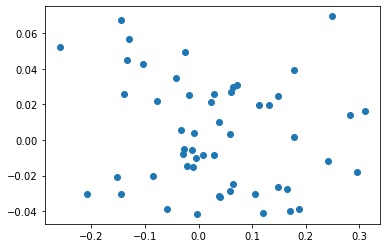

In [16]:
plt.scatter(y_test, predictions)

(array([ 1.,  2.,  5.,  5.,  9., 11.,  7.,  6.,  3.,  4.]),
 array([-0.31071921, -0.24841486, -0.18611052, -0.12380617, -0.06150182,
         0.00080252,  0.06310687,  0.12541122,  0.18771556,  0.25001991,
         0.31232426]),
 <a list of 10 Patch objects>)

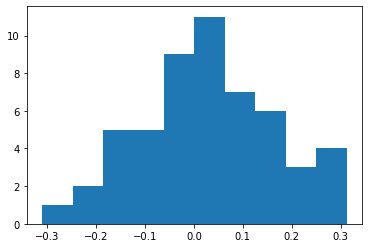

In [17]:
plt.hist(y_test - predictions)

In [18]:
df.corr()

,y1_ret,Year,y1_ret_ward_y,Price_y,Number_of_Parks,Num_Primary_Schools,Primary_School_AVG_Rating,Num_Secondary_Schools,Secondary_School_AVG_Rating,Num_Post_16_Schools,Post_16_School_AVG_Rating,Number_of_Healthcare_Services,Number_of_Dentistries,Number_of_High_Severity_Crimes_Previous_Year,Number_of_Low_Severity_Crimes_Previous_Year,Type_D
y1_ret,1.000000,-1.380549e-01,0.953683,0.088509,0.040589,0.017438,1.318968e-02,-0.011697,-0.004387,0.003749,0.018268,-0.009751,-0.010569,-0.039607,-0.106737,NaN
Year,-0.138055,1.000000e+00,-0.130693,0.325818,0.000000,0.000000,1.201942e-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.053853,0.422084,NaN
y1_ret_ward_y,0.953683,-1.306932e-01,1.000000,0.112229,0.038557,0.016565,1.252904e-02,-0.011111,-0.004168,0.003562,0.017352,-0.009263,-0.010040,-0.072287,-0.060731,NaN
Price_y,0.088509,3.258178e-01,0.112229,1.000000,0.107328,0.411966,2.380684e-02,0.608593,0.156078,0.360484,-0.061840,0.318770,0.110720,-0.042987,0.080813,NaN
Number_of_Parks,0.040589,0.000000e+00,0.038557,0.107328,1.000000,0.184429,2.144148e-02,-0.137135,-0.206156,-0.045579,-0.210825,-0.094293,-0.163221,0.134195,0.211136,NaN
Num_Primary_Schools,0.017438,0.000000e+00,0.016565,0.411966,0.184429,1.000000,6.827887e-02,0.790569,0.410305,0.423334,0.085446,0.504453,-0.045480,0.084239,0.068551,NaN
Primary_School_AVG_Rating,0.013190,1.201942e-17,0.012529,0.023807,0.021441,0.068279,1.000000e+00,0.118754,0.109259,0.043357,0.050319,0.019374,0.061718,-0.021697,0.004235,NaN
Num_Secondary_Schools,-0.011697,0.000000e+00,-0.011111,0.608593,-0.137135,0.790569,1.187542e-01,1.000000,0.583874,0.562254,0.283713,0.518447,0.000000,-0.020827,-0.078152,NaN
Secondary_School_AVG_Rating,-0.004387,0.000000e+00,-0.004168,0.156078,-0.206156,0.410305,1.092591e-01,0.583874,1.000000,0.531510,0.796709,0.364802,0.197334,0.008826,-0.076198,NaN
Num_Post_16_Schools,0.003749,0.000000e+00,0.003562,0.360484,-0.045579,0.423334,4.335713e-02,0.562254,0.531510,1.000000,0.675512,0.296304,0.160281,-0.052601,-0.079406,NaN


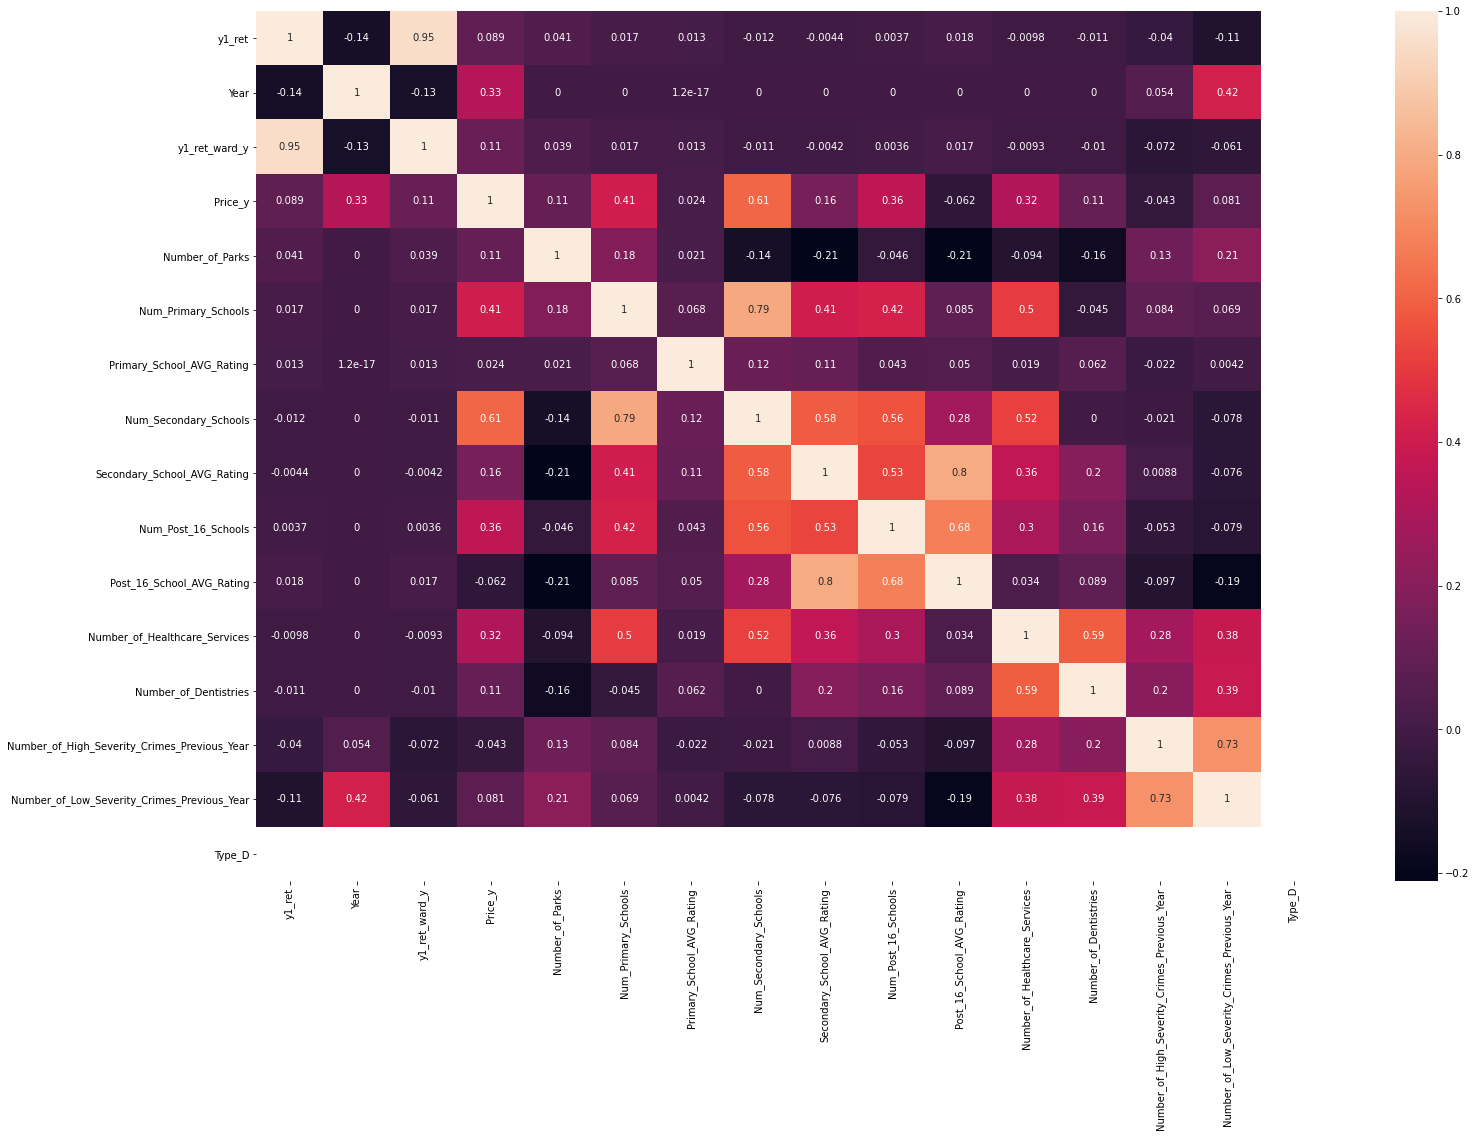

In [19]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*4, Size[1]*4, forward=True)
plt.show()

In [20]:
df.columns

Index(['y1_ret', 'Year', 'y1_ret_ward_y', 'Price_y', 'Number_of_Parks',
       'Num_Primary_Schools', 'Primary_School_AVG_Rating',
       'Num_Secondary_Schools', 'Secondary_School_AVG_Rating',
       'Num_Post_16_Schools', 'Post_16_School_AVG_Rating',
       'Number_of_Healthcare_Services', 'Number_of_Dentistries',
       'Number_of_High_Severity_Crimes_Previous_Year',
       'Number_of_Low_Severity_Crimes_Previous_Year', 'Type_D'],
      dtype='object')

In [21]:
import statsmodels.formula.api as smf
model2 = smf.ols('y1_ret ~ Price_y+ Num_Secondary_Schools+ Secondary_School_AVG_Rating+ Num_Post_16_Schools+ Post_16_School_AVG_Rating+ Number_of_Healthcare_Services+ Type_D', data = df).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 y1_ret   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.6883
Date:                Sat, 20 Aug 2022   Prob (F-statistic):              0.659
Time:                        19:51:58   Log-Likelihood:                 120.62
No. Observations:                 176   AIC:                            -227.2
Df Residuals:                     169   BIC:                            -205.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -0.0226      0.017     -1.296      0.197      -0.057       0.012
Price_y                        8.105e-08   4.16e-08      1.948      0.053   -1.09e-09    1.63e-07
Num_Secondary_Schools            -0.0077      0.016     -0.475      0.635      -0.039       0.024
Secondary_School_AVG_Rating      -0.0129      0.018     -0.704      0.483      -0.049       0.023
Num_Post_16_Schools              -0.0266      0.028     -0.935      0.351      -0.083       0.030
Post_16_School_AVG_Rating         0.0241      0.021      1.123      0.263      -0.018       0.067
Number_of_Healthcare_Services     0.0043      0.009      0.474      0.636      -0.014       0.022
Type_D                           -0.0226      0.017     -1.296      0.197      -0.057       0.012
==============================================================================
Omnibus:                        2.664   Durbin-Watson:                   2.857
Prob(Omnibus):                  0.264   Jarque-Bera (JB):                2.501
Skew:                           0.120   Prob(JB):                        0.286
Kurtosis:                       3.532   Cond. No.                     2.62e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.79e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [22]:
#model2 = smf.ols('y1_ret_ward_y ~ Price_y+Number_of_Parks+Num_Primary_Schools+Primary_School_AVG_Rating+ Num_Secondary_Schools+ Secondary_School_AVG_Rating+ Num_Post_16_Schools+ Post_16_School_AVG_Rating+ Number_of_Healthcare_Services+ Number_of_Dentistries+Number_of_High_Severity_Crimes_Previous_Year+Number_of_Low_Severity_Crimes_Previous_Year+Type_D', data = df).fit()


In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [24]:
mse_val = mean_squared_error(y_test, predictions)
mse_val

0.019474386902710455

In [25]:
from sklearn.preprocessing import PolynomialFeatures

X = df.drop(['y1_ret'], axis=1)
y = df['y1_ret']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape, X_test.shape)

(132, 15) (44, 15)


In [ ]:
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X_train)
 
poly.fit(X_poly, y_train)

lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

In [ ]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X_train, y_train, color='red')
    plt.plot(X_train, pol_reg.predict(poly_reg.fit_transform(X_train)), color='blue')
    plt.title('Poly Regression')
    plt.xlabel('Position level')
    plt.ylabel('yoy')
    plt.show()
    return
viz_polymonial()